##WorldCloud 구현

문장에서 출연한 단어의 빈도수로 크기를 구하는거 (영문)

In [1]:
from wordcloud import WordCloud
import numpy as np 
import pandas as pd 
import nltk #영어 단어 모음
import re 
import matplotlib.pyplot as plt
from PIL import Image   
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
f = open("/content/drive/MyDrive/인공지능사관학교/빅데이터/03_확률 모델링_업데이트/data/book_crime_and_punishment.txt","r",encoding="UTF-8")

my_book = f.readlines()
f.close()

In [5]:
my_book[:10] #책의 행 1한줄이 list 한줄

['\ufeffPART I\n',
 '\n',
 '\n',
 '\n',
 'CHAPTER I\n',
 '\n',
 'On an exceptionally hot evening early in July a young man came out of\n',
 'the garret in which he lodged in S. Place and walked slowly, as though\n',
 'in hesitation, towards K. bridge.\n',
 '\n']

##전처리

In [6]:
n_min = 4
corpus = [] #정제된 말뭉치 담기 
for line in my_book:
  pre = re.sub("\W"," ",line) #특수문자 패턴 공백 만들기
  pre= re.sub("_"," ",pre)
  pre = re.sub("\d+"," ",pre)
  pre = nltk.word_tokenize(pre) #단어 토큰화
  pre = [x for x in pre if len(x)>n_min] #단어의 길이가 4보다 큰것만 넣기
  pre = [x.lower() for x in pre] #소문자로 정규화 
  pre = [x for x in pre if x not in stopwords.words('english') + ['would','could','looked','though','with','without']] #x 가 불용어 사전에 없으면 등록 

  corpus+=pre #단어들이 나열된 1차원 리스트가 된다.



In [7]:
print(corpus[:25]) #행 하나하나가 리스트 이다 

['chapter', 'exceptionally', 'evening', 'early', 'young', 'garret', 'lodged', 'place', 'walked', 'slowly', 'hesitation', 'towards', 'bridge', 'successfully', 'avoided', 'meeting', 'landlady', 'staircase', 'garret', 'storied', 'house', 'cupboard', 'landlady', 'provided', 'garret']


In [8]:
len(stopwords.words("english")) #불용어 사전은 179단어

179

In [9]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

##키워드 추출 (option): 필수는 아님 



In [10]:
my_series = pd.Series(corpus)

In [11]:
#빈도수 가 많은 단어 를 Top 10 출력 
my_words_count = my_series.value_counts().sort_values(ascending = False)
my_words_count[:10]

raskolnikov    785
sonia          402
razumihin      347
dounia         325
thought        305
ivanovna       304
suddenly       292
something      292
little         289
petrovitch     287
dtype: int64

In [12]:
my_dict = dict(my_words_count)

In [13]:
display(my_dict)

{'raskolnikov': 785,
 'sonia': 402,
 'razumihin': 347,
 'dounia': 325,
 'thought': 305,
 'ivanovna': 304,
 'suddenly': 292,
 'something': 292,
 'little': 289,
 'petrovitch': 287,
 'nothing': 285,
 'still': 269,
 'began': 265,
 'cried': 241,
 'first': 230,
 'right': 218,
 'mother': 218,
 'katerina': 216,
 'looking': 215,
 'almost': 215,
 'perhaps': 209,
 'think': 207,
 'svidrigaïlov': 207,
 'porfiry': 206,
 'moment': 203,
 'woman': 203,
 'another': 198,
 'shall': 194,
 'asked': 187,
 'quite': 186,
 'going': 185,
 'seemed': 184,
 'understand': 177,
 'stood': 175,
 'turned': 175,
 'pyotr': 173,
 'course': 168,
 'everything': 168,
 'people': 168,
 'money': 166,
 'never': 165,
 'believe': 165,
 'might': 164,
 'great': 162,
 'heard': 158,
 'better': 150,
 'hands': 150,
 'anything': 145,
 'yesterday': 138,
 'thing': 138,
 'simply': 137,
 'indeed': 136,
 'always': 135,
 'three': 134,
 'sister': 132,
 'heart': 132,
 'really': 131,
 'strange': 127,
 'rodya': 127,
 'question': 124,
 'pulcheria': 

##wordcloud 만들기 

In [14]:
#1 리스트 가 아닌 하나의 문장으로 만든다.
a_long_sentence = ' '.join(corpus)

In [15]:
a_long_sentence #하나의 문장으로 만든다

'chapter exceptionally evening early young garret lodged place walked slowly hesitation towards bridge successfully avoided meeting landlady staircase garret storied house cupboard landlady provided garret dinners attendance lived floor every obliged kitchen invariably stood passed young frightened feeling scowl ashamed hopelessly landlady afraid meeting cowardly abject quite contrary overstrained irritable condition verging hypochondria become completely absorbed isolated fellows dreaded meeting landlady anyone crushed poverty anxieties position ceased weigh given attending matters practical importance desire nothing landlady terror stopped stairs forced listen trivial irrelevant gossip pestering demands payment threats complaints brains excuses prevaricate rather creep stairs unseen evening however coming street became acutely aware fears attempt thing frightened trifles thought smile hands cowardice axiom interesting afraid taking uttering talking chatter nothing perhaps chatter not

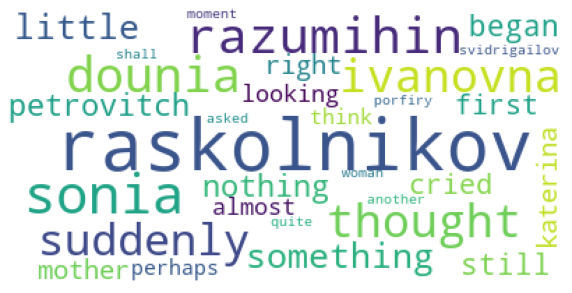

In [16]:
wc = WordCloud(background_color='white',max_words=30)
#wc.generate(a_long_sentence)
wc.generate_from_frequencies(my_dict) #이것도 가능 dict 형태로 구분할려면 dict 는 값이 카운팅 되어야 함

plt.figure(figsize = (10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

##word cloud mask

In [19]:
img = Image.open('/content/drive/MyDrive/인공지능사관학교/빅데이터/03_확률 모델링_업데이트/data/background_3.png') #open 만 해도 읽어옴

In [20]:
type(img)

PIL.PngImagePlugin.PngImageFile

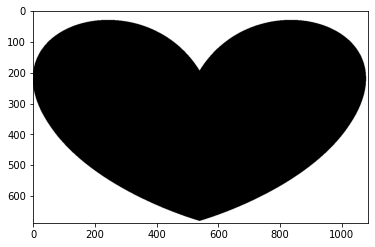

In [21]:
plt.imshow(img)

In [22]:
back_mask = np.array(img) #함수의 매개변수 요구 때문에 type 에러 떄문에 

In [23]:
wc = WordCloud(background_color='white',max_words=30,mask = back_mask)
wc.generate(a_long_sentence)

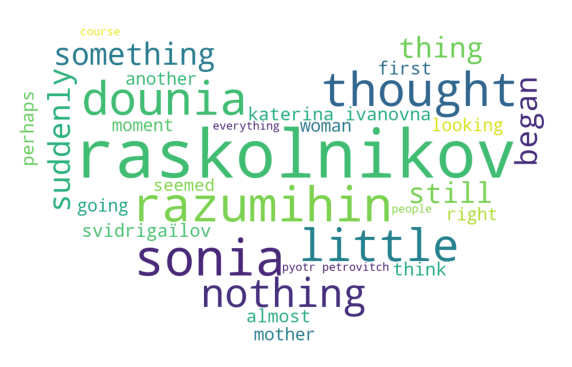

In [24]:
plt.figure(figsize = (10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()